CNN_AGRI_PEST_CLASSIFICATION

In [56]:
pip install split-folders[full]


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install opencv-python

   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/39.0 MB ? eta -:--:--
    --------------------------------------- 0.5/39.0 MB 328.9 kB/s eta 0:01:57
    --------------------------------------- 0.5/39.0 MB 328.9 kB/s eta 0:01:57
    --------------------------------------- 0.5/39.0 MB 328.9 kB/s eta 0:01:57
    --------------------------------------- 0.5/39.0 MB 328.9 kB/s eta 0:01:57
    --------------------------------------- 0.5/39.0 MB 328.9 kB/s eta 0:01:57
    --------------------------------------- 0

In [4]:
pip install tensorflow

   ---------------------------------------- 0.0/26.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/26.4 MB ? eta -:--:--
   ---------------------------------------- 0.3/26.4 MB ? eta -:--:--
    --------------------------------------- 0.5/26.4 MB 1.0 MB/s eta 0:00:25
   - -------------------------------------- 0.8/26.4 MB 1.0 MB/s eta 0:00:25
   - -------------------------------------- 0.8/26.4 MB 1.0 MB/s eta 0:00:25
   - -------------------------------------- 1.0/26.4 MB 853.0 kB/s eta 0:00:30
   - -------------------------------------- 1.3/26.4 MB 907.1 kB/s eta 0:00:28
   -- ------------------------------------- 1.6/26.4 MB 953.2 kB/s eta 0:00:27
   -- ------------------------------------- 1.8/26.4 MB 949.8 kB/s eta 0:00:26
   -- ------------------------------------- 1.8/26.4 MB 949.8 kB/s eta 0:00:26
   --- ------------------------------------ 2.1/26.4 MB 910.7 kB/s eta 0:00:27
   --- ------------------------------------ 2.4/26.4 MB 913.0 kB/s eta 0:00:27
   ---

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
googleapis-common-protos 1.63.2 requires protobuf!=3.20.0,!=3.20.1,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0.dev0,>=3.20.2, but you have protobuf 3.19.6 which is incompatible.


In [6]:
import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'
# display, transform, read, split ...
import numpy as np
import cv2 as cv
import os
import splitfolders
import matplotlib.pyplot as plt

# tensorflow
import tensorflow.keras as keras
import tensorflow as tf

# image processing
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

# model / neural network
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model


In [73]:
splitfolders.ratio("C:\\Users\\exam10\\Downloads\\AGRICULTURAL_PEST\\", output="C:\\Users\\exam10\\Downloads\\AGRI split\\data-split",seed=1337,group_prefix=None,move=False)

Copying files: 4030 files [00:43, 92.39 files/s] 


In [74]:
datagen = ImageDataGenerator()

In [75]:
# define classes name
class_names = ['ants','bees','beetle','caterpillar','earthworms','grasshopper','moth','slug','weevil']

In [76]:
# training data
train_generator = datagen.flow_from_directory( 
    directory="C:\\Users\\exam10\\Downloads\\AGRI split\\data-split\\train", 
    classes = class_names,
    target_size=(300, 300),  
    batch_size=32, 
    class_mode="binary", 
)

Found 2874 images belonging to 9 classes.


In [81]:
# validation data
valid_generator = datagen.flow_from_directory( 
    directory="C:\\Users\\exam10\\Downloads\\AGRI split\\data-split\\val", 
    classes = class_names,
    target_size=(300, 300), 
    batch_size=32, 
    class_mode="binary", 
)

Found 356 images belonging to 9 classes.


In [80]:
# test data
test_generator = datagen.flow_from_directory( 
    directory="C:\\Users\\exam10\\Downloads\\AGRI split\\data-split\\test", 
    classes = class_names,
    target_size=(300, 300), 
    batch_size=32, 
    class_mode="binary", 
)

Found 366 images belonging to 9 classes.


In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [83]:
model_history =model.fit(train_generator, validation_data=valid_generator, epochs=10, batch_size=32)

Epoch 1/10
90/90 [==============================] - 139s 2s/step - loss: -4947581952.0000 - accuracy: 0.1388 - val_loss: -30295193600.0000 - val_accuracy: 0.1404
Epoch 2/10
90/90 [==============================] - 118s 1s/step - loss: -285012066304.0000 - accuracy: 0.1392 - val_loss: -882838863872.0000 - val_accuracy: 0.1404
Epoch 3/10
90/90 [==============================] - 114s 1s/step - loss: -2806965600256.0000 - accuracy: 0.1392 - val_loss: -5967658352640.0000 - val_accuracy: 0.1404
Epoch 4/10
90/90 [==============================] - 116s 1s/step - loss: -12368780197888.0000 - accuracy: 0.1392 - val_loss: -21754313441280.0000 - val_accuracy: 0.1404
Epoch 5/10
90/90 [==============================] - 115s 1s/step - loss: -37034173399040.0000 - accuracy: 0.1392 - val_loss: -57648275783680.0000 - val_accuracy: 0.1404
Epoch 6/10
90/90 [==============================] - 113s 1s/step - loss: -86805718237184.0000 - accuracy: 0.1392 - val_loss: -124813670612992.0000 - val_accuracy: 0.140

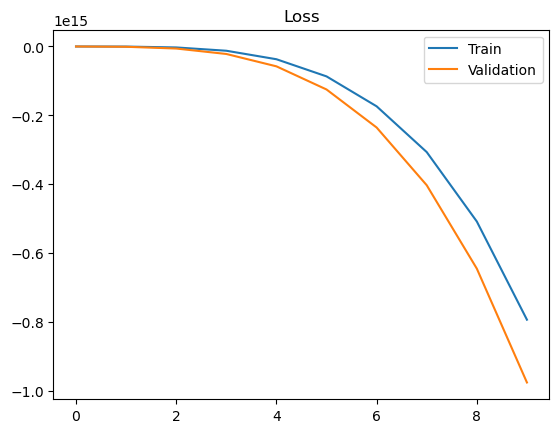

In [84]:
loss_train_curve = model_history.history["loss"]
loss_val_curve = model_history.history["val_loss"]
plt.plot(loss_train_curve, label = "Train")
plt.plot(loss_val_curve, label = "Validation")
plt.legend(loc = 'upper right')
plt.title("Loss")
plt.show()

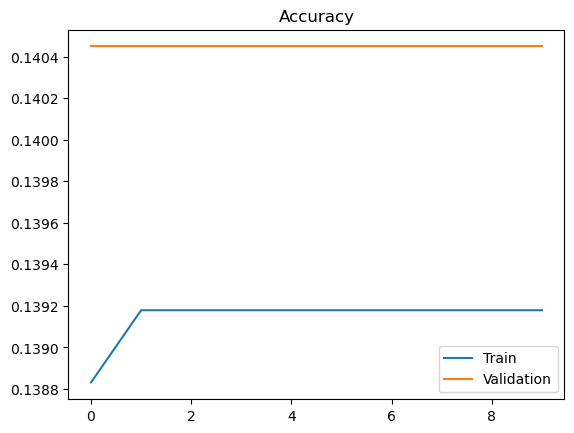

In [85]:
acc_train_curve = model_history.history["accuracy"]
acc_val_curve = model_history.history["val_accuracy"]
plt.plot(acc_train_curve, label = "Train")
plt.plot(acc_val_curve, label = "Validation")
plt.legend(loc = 'lower right')
plt.title("Accuracy")
plt.show()

In [86]:
test_loss, test_acc = model.evaluate(test_generator)
print("The test loss is: ", test_loss)
print("The best accuracy is: ", test_acc*100)

12/12 [==============================] - 18s 2s/step - loss: -960528096690176.0000 - accuracy: 0.1366
The test loss is:  -960528096690176.0
The best accuracy is:  13.661202788352966


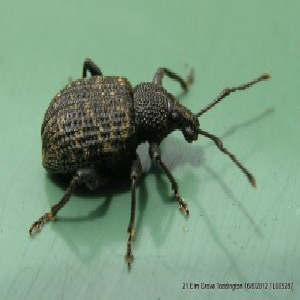

In [90]:
img = tf.keras.preprocessing.image.load_img("C:\\Users\\exam10\\Downloads\\AGRI split\\data-split\\val\\weevil\\Weevil (148).jpg", target_size=(300, 300))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.array([img_array]) 
img

In [91]:
# generate predictions for samples
prediction = model.predict(img_array)
if prediction[0][0] > 0.5:
    print("ants")
elif prediction[0][0] == 0.5:
    print("bees")
else:
    print("other pests")

1/1 [==============================] - 0s 302ms/step
ants
